In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC,LinearSVC

In [2]:
train = pd.read_csv("train.csv")
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
test = pd.read_csv("test.csv")
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [4]:
pd.read_csv("sample_submission.csv")

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [5]:
# The target column is Transported

In [6]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
train['Age_null']=train['Age'].isnull()
train['RoomService_null']=train['RoomService'].isnull()
train['FoodCourt_null']=train['FoodCourt'].isnull()
train['ShoppingMall_null']=train['ShoppingMall'].isnull()
train['Spa_null']=train['Spa'].isnull()
train['VRDeck_null']=train['VRDeck'].isnull()

In [10]:
test['Age_null']=test['Age'].isnull()
test['RoomService_null']=test['RoomService'].isnull()
test['FoodCourt_null']=test['FoodCourt'].isnull()
test['ShoppingMall_null']=test['ShoppingMall'].isnull()
test['Spa_null']=test['Spa'].isnull()
test['VRDeck_null']=test['VRDeck'].isnull()

In [11]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_null,RoomService_null,FoodCourt_null,ShoppingMall_null,Spa_null,VRDeck_null
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,False,False,False,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,False,False,False,False,False,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,False,False,False,False,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,False,False,False,False,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,False,False,False,False,False,False


In [12]:
train.loc[:, 'Age'] = train.loc[:, 'Age'].fillna(train['Age'].median())
train.loc[:, 'RoomService'] = train.loc[:, 'RoomService'].fillna(0)
train.loc[:, 'FoodCourt'] = train.loc[:, 'FoodCourt'].fillna(0)
train.loc[:, 'ShoppingMall'] = train.loc[:, 'ShoppingMall'].fillna(0)
train.loc[:, 'Spa'] = train.loc[:, 'Spa'].fillna(train['Spa'].median())
train.loc[:, 'VRDeck'] = train.loc[:, 'VRDeck'].fillna(train['VRDeck'].median())

In [13]:
test.loc[:, 'Age'] = test.loc[:, 'Age'].fillna(test['Age'].median())
test.loc[:, 'RoomService'] = test.loc[:, 'RoomService'].fillna(0)
test.loc[:, 'FoodCourt'] = test.loc[:, 'FoodCourt'].fillna(0)
test.loc[:, 'ShoppingMall'] = test.loc[:, 'ShoppingMall'].fillna(0)
test.loc[:, 'Spa'] = test.loc[:, 'Spa'].fillna(test['Spa'].median())
test.loc[:, 'VRDeck'] = test.loc[:, 'VRDeck'].fillna(test['VRDeck'].median())

In [14]:
train['Age_null']=train['Age'].astype(int)
train['RoomService_null']=train['RoomService'].astype(int)
train['FoodCourt_null']=train['FoodCourt'].astype(int)
train['ShoppingMall_null']=train['ShoppingMall'].astype(int)
train['Spa_null']=train['Spa'].astype(int)
train['VRDeck_null']=train['VRDeck'].astype(int)

In [15]:
test['Age_null']=test['Age'].astype(int)
test['RoomService_null']=test['RoomService'].astype(int)
test['FoodCourt_null']=test['FoodCourt'].astype(int)
test['ShoppingMall_null']=test['ShoppingMall'].astype(int)
test['Spa_null']=test['Spa'].astype(int)
test['VRDeck_null']=test['VRDeck'].astype(int)

In [16]:
# Assume df is your DataFrame
# Replace 'df' with the name of your DataFrame

numerical_features = train.select_dtypes(include=float)
categorical_features = train.select_dtypes(include=[object , bool])  # Using 'object' directly

print("Numerical Features:", numerical_features.shape, numerical_features.columns)
print("Categorical Features:", categorical_features.shape, categorical_features.columns)

Numerical Features: (8693, 6) Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')
Categorical Features: (8693, 8) Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name', 'Transported'],
      dtype='object')


<Axes: >

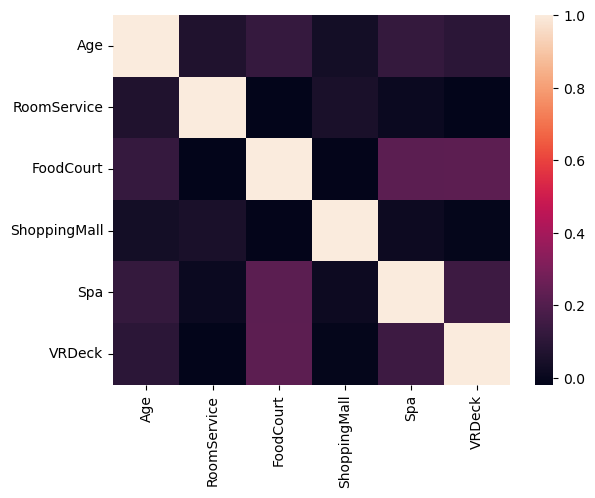

In [17]:
sns.heatmap(numerical_features.corr())

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Iterate over each categorical column and encode its values
for column in categorical_features.columns:
    train[column] = label_encoder.fit_transform(train[column])

# Display the encoded DataFrame
print("Encoded DataFrame:")
train.head()

Encoded DataFrame:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_null,RoomService_null,FoodCourt_null,ShoppingMall_null,Spa_null,VRDeck_null
0,0,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,5252,0,39,0,0,0,0,0
1,1,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,4502,1,24,109,9,25,549,44
2,2,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,457,0,58,43,3576,0,6715,49
3,3,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,7149,0,33,0,1283,371,3329,193
4,4,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,8319,1,16,303,70,151,565,2


In [19]:
test.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Age_null', 'RoomService_null', 'FoodCourt_null',
       'ShoppingMall_null', 'Spa_null', 'VRDeck_null'],
      dtype='object')

In [20]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Age_null,RoomService_null,FoodCourt_null,ShoppingMall_null,Spa_null,VRDeck_null
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,27,0,0,0,0,0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,19,0,9,0,2823,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,31,0,0,0,0,0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,38,0,6652,0,181,585
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,20,10,0,635,0,0


In [21]:
# Assume df is your DataFrame
# Replace 'df' with the name of your DataFrame

numerical_features = test.select_dtypes(include=float)
categorical_features = test.select_dtypes(include=[object , bool])  # Using 'object' directly

print("Numerical Features:", numerical_features.shape, numerical_features.columns)
print("Categorical Features:", categorical_features.shape, categorical_features.columns)

Numerical Features: (4277, 6) Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')
Categorical Features: (4277, 7) Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')


In [22]:
PassengerId = test["PassengerId"].tolist()

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Iterate over each categorical column and encode its values
for column in categorical_features.columns:
    test[column] = label_encoder.fit_transform(test[column])

# Display the encoded DataFrame
print("Encoded DataFrame:")
test.head()

Encoded DataFrame:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Age_null,RoomService_null,FoodCourt_null,ShoppingMall_null,Spa_null,VRDeck_null
0,0,0,1,2784,2,27.0,0,0.0,0.0,0.0,0.0,0.0,2912,27,0,0,0,0,0
1,1,0,0,1867,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,2406,19,0,9,0,2823,0
2,2,1,1,257,0,31.0,0,0.0,0.0,0.0,0.0,0.0,3376,31,0,0,0,0,0
3,3,1,0,259,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,2711,38,0,6652,0,181,585
4,4,0,0,1940,2,20.0,0,10.0,0.0,635.0,0.0,0.0,668,20,10,0,635,0,0


In [24]:
train["Transported"].value_counts()

Transported
1    4378
0    4315
Name: count, dtype: int64

#### Since  the classes are balanced no need to use resampling techniques (undersampling and oversampling)

<Axes: >

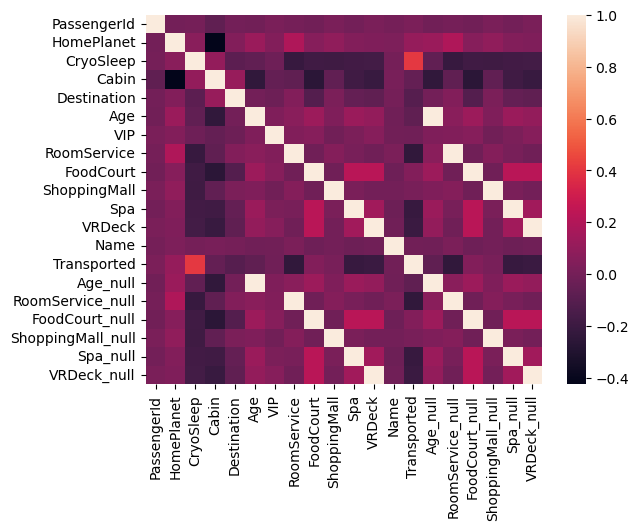

In [25]:
sns.heatmap(train.corr())

In [26]:
X_train = train.drop(["Transported"],axis=1)
Y_train = train["Transported"].values
X_test = test
'''from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_train)
X_train = pd.DataFrame(np_scaled)
#min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_test)
X_test = pd.DataFrame(np_scaled)'''

'from sklearn.preprocessing import MinMaxScaler\nmin_max_scaler=MinMaxScaler()\nnp_scaled = min_max_scaler.fit_transform(X_train)\nX_train = pd.DataFrame(np_scaled)\n#min_max_scaler = preprocessing.MinMaxScaler()\nnp_scaled = min_max_scaler.fit_transform(X_test)\nX_test = pd.DataFrame(np_scaled)'

In [27]:
RF =  RandomForestClassifier()
RF.fit(X_train, Y_train)
Y_pred_RF = RF.predict(X_test)
acc_random_forest = RF.score(X_train, Y_train)
acc_random_forest

1.0

In [28]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
Y_pred = linreg.predict(X_test)
acc_log = linreg.score(X_train, Y_train)
acc_log

0.2928074048748228

In [29]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = svc.score(X_train, Y_train)
acc_svc

0.7802829863108248

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = gaussian.score(X_train, Y_train)
acc_gaussian

0.6841136546646728

In [31]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc =linear_svc.score(X_train, Y_train)
acc_linear_svc

0.6958472334061889

In [32]:
models = pd.DataFrame({
        'Model': ['Support Vector Machines', 'Linear Regression', 'Random Forest', 'Naive Bayes', 'Linear SVC'],
        'Score': [acc_svc, acc_log, acc_random_forest, acc_gaussian, acc_linear_svc]
    })
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,1.000000
0,Support Vector Machines,0.780283
4,Linear SVC,0.695847
3,Naive Bayes,0.684114
1,Linear Regression,0.292807


In [33]:
Y_pred = Y_pred_RF.tolist()
for i in range(len(Y_pred)):
    if Y_pred[i] == 1:
        Y_pred[i] = 'True'
    else:
        Y_pred[i] = 'False'
y_pred = np.array(Y_pred)

In [34]:
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Transported": Y_pred
    })
submission.to_csv('./submission.csv', index=False)